In [27]:
#pip install pandas numpy matplotlib seaborn scikit-learn

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [29]:
data = pd.read_csv('student-scores.csv')

# Display the first few rows and basic information about the dataset
print(data.head())
print(data.info())

   id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1         

In [30]:
# Identify numeric and non-numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
categorical_columns = data.select_dtypes(exclude=[np.number]).columns

print("Numeric columns:", numeric_columns)
print("Categorical columns:", categorical_columns)

Numeric columns: Index(['id', 'absence_days', 'weekly_self_study_hours', 'math_score',
       'history_score', 'physics_score', 'chemistry_score', 'biology_score',
       'english_score', 'geography_score'],
      dtype='object')
Categorical columns: Index(['first_name', 'last_name', 'email', 'gender', 'part_time_job',
       'extracurricular_activities', 'career_aspiration'],
      dtype='object')


In [31]:
# Descriptive statistics for numeric columns
print(data[numeric_columns].describe())

                id  absence_days  weekly_self_study_hours   math_score  \
count  2000.000000   2000.000000              2000.000000  2000.000000   
mean   1000.500000      3.665500                17.755500    83.452000   
std     577.494589      2.629271                12.129604    13.224906   
min       1.000000      0.000000                 0.000000    40.000000   
25%     500.750000      2.000000                 5.000000    77.000000   
50%    1000.500000      3.000000                18.000000    87.000000   
75%    1500.250000      5.000000                28.000000    93.000000   
max    2000.000000     10.000000                50.000000   100.000000   

       history_score  physics_score  chemistry_score  biology_score  \
count    2000.000000    2000.000000      2000.000000     2000.00000   
mean       80.332000      81.336500        79.995000       79.58150   
std        12.736046      12.539453        12.777895       13.72219   
min        50.000000      50.000000        50.000

In [32]:
# Frequency of categorical variables
for col in categorical_columns:
    print(f"\nFrequency of {col}:")
    print(data[col].value_counts())


Frequency of first_name:
first_name
Michael        40
David          39
Jennifer       36
Christopher    35
Robert         28
               ..
Bridget         1
Kara            1
Sherri          1
Peggy           1
Dwayne          1
Name: count, Length: 453, dtype: int64

Frequency of last_name:
last_name
Smith      41
Jones      29
Miller     28
Brown      25
Johnson    24
           ..
Benson      1
Novak       1
Burch       1
Pace        1
Andrade     1
Name: count, Length: 707, dtype: int64

Frequency of email:
email
mary.jackson.1984@gslingacademy.com         1
debra.gilbert.1983@gslingacademy.com        1
shane.parker.1982@gslingacademy.com         1
alison.palmer.1981@gslingacademy.com        1
allison.henderson.1980@gslingacademy.com    1
                                           ..
anthony.campos.5@gslingacademy.com          1
tara.clark.4@gslingacademy.com              1
tina.andrews.3@gslingacademy.com            1
danielle.sandoval.2@gslingacademy.com       1
paul.casey.

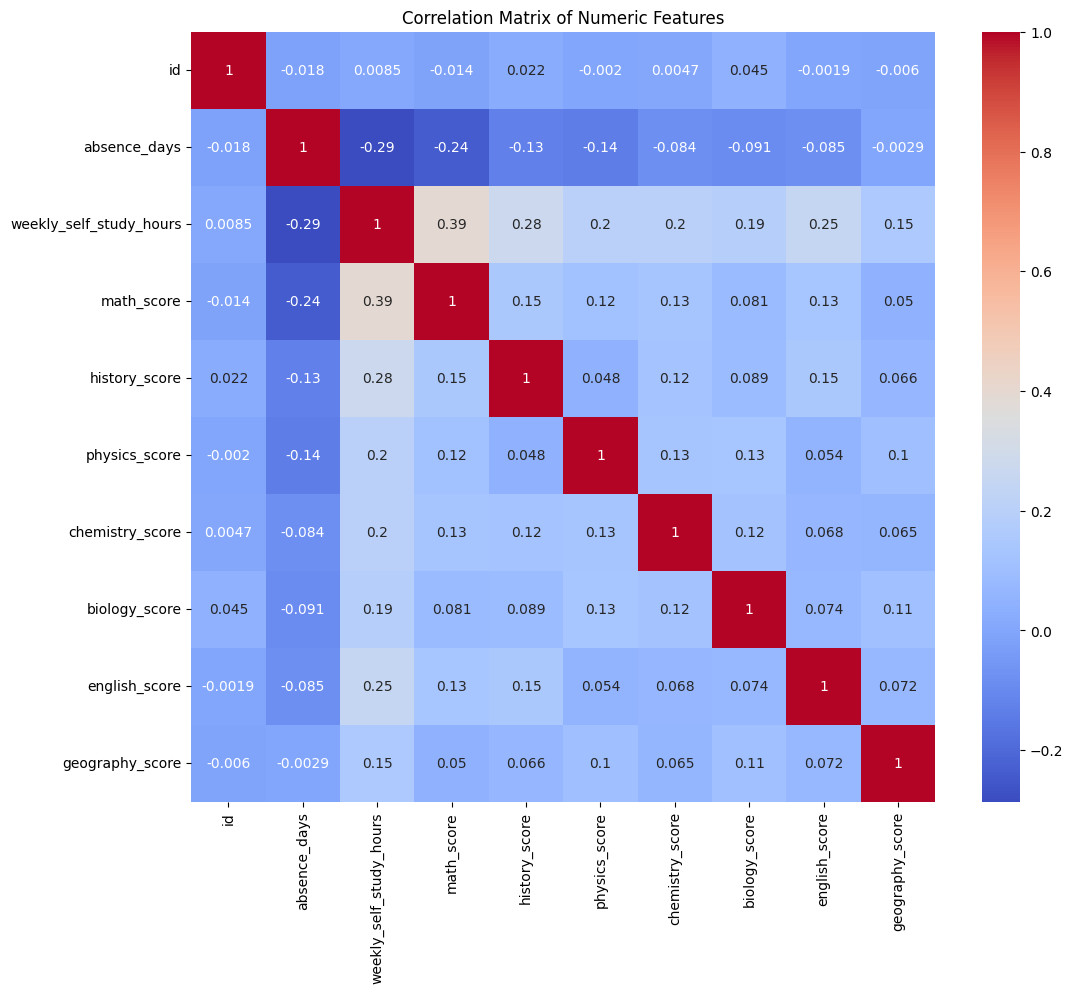

In [33]:
# Correlation matrix for numeric columns
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

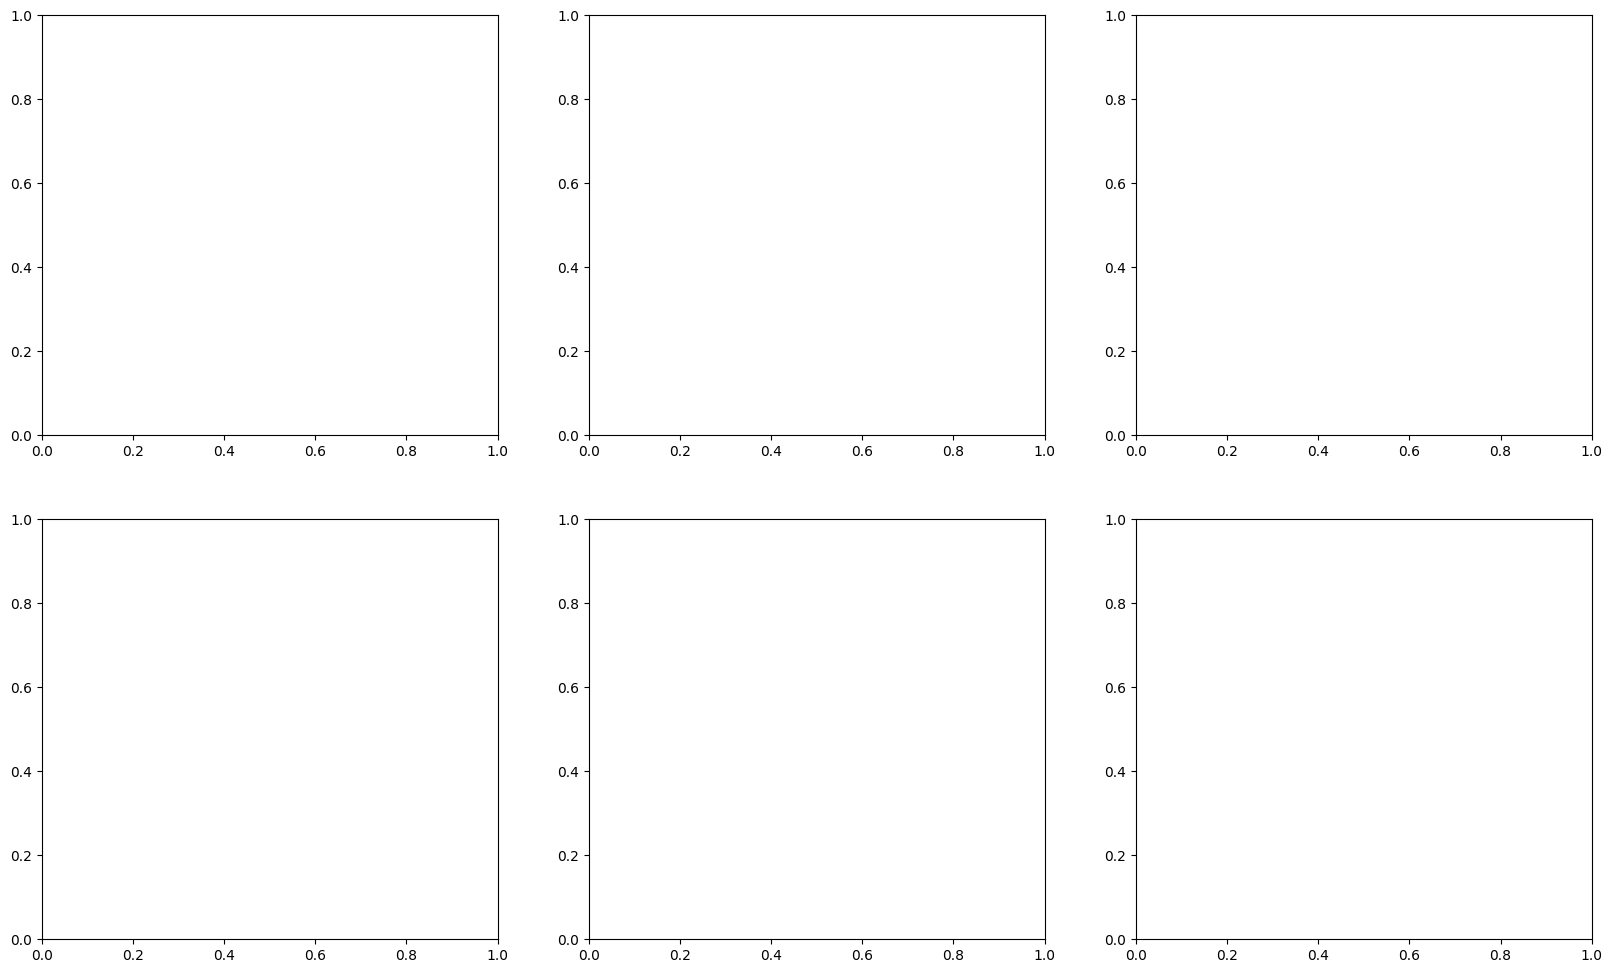

In [34]:
# Scatter plots for score columns
score_columns = [col for col in numeric_columns if 'score' in col and col != 'math_score']
n_plots = len(score_columns)
n_rows = (n_plots + 2) // 3  # Menghitung jumlah baris yang diperlukan
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 6*n_rows))
axes = axes.ravel()  # Flatten array of axes

In [35]:
for i, col in enumerate(score_columns):
    sns.scatterplot(x=col, y='math_score', data=data, ax=axes[i])
    axes[i].set_title(f'{col} vs math_score')

# Menyembunyikan axes yang tidak digunakan
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [36]:
# Function to perform linear regression and plot results
def perform_regression(X, y, feature_names):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'R-squared Score: {r2:.4f}')
    
    # Print coefficients
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_})
    print(coef_df)
    
    # Plot predicted vs actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs Actual Values')
    plt.show()
    
    return model, mse, r2

In [37]:
# Prepare data for regression
y = data['math_score']
X_all_scores = data[[col for col in score_columns if col != 'math_score']]

Regression using all score features:
Mean Squared Error: 152.7884
R-squared Score: 0.0793
           Feature  Coefficient
0    history_score     0.122129
1    physics_score     0.093716
2  chemistry_score     0.078594
3    biology_score     0.049946
4    english_score     0.099624
5  geography_score     0.006171


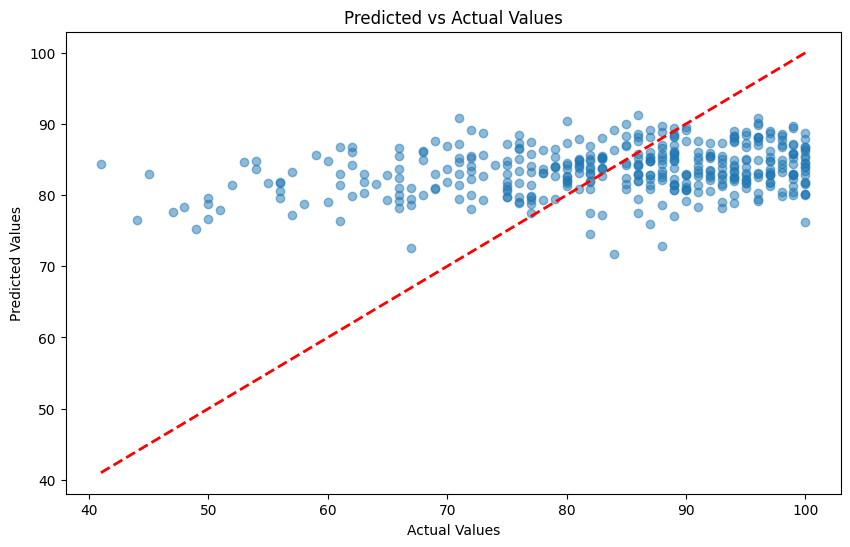

In [38]:
# Perform regression with different combinations of features

print("Regression using all score features:")
model_all_scores, mse_all_scores, r2_all_scores = perform_regression(X_all_scores, y, X_all_scores.columns)



Regression using physics and English scores:
Mean Squared Error: 157.6397
R-squared Score: 0.0500
         Feature  Coefficient
0  physics_score     0.114443
1  english_score     0.121297


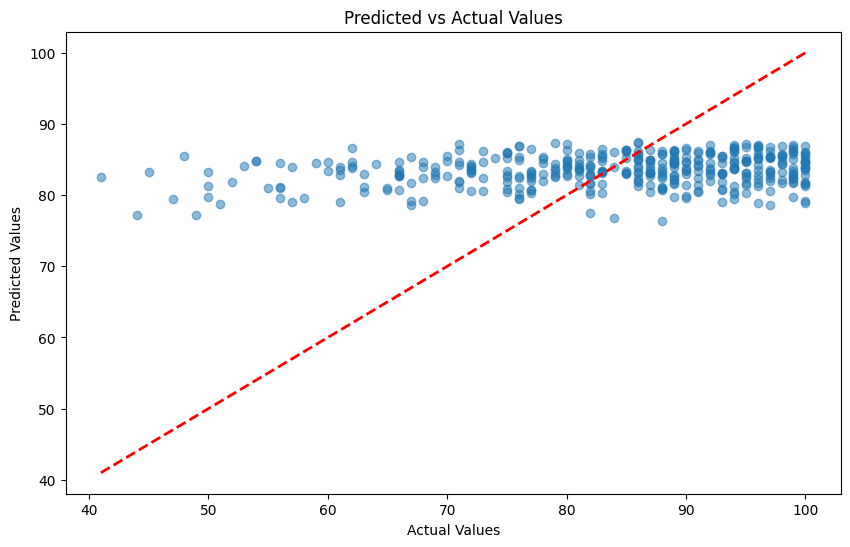

In [39]:
# Using physics and English scores
X_phys_eng = data[['physics_score', 'english_score']]

print("\nRegression using physics and English scores:")
model_phys_eng, mse_phys_eng, r2_phys_eng = perform_regression(X_phys_eng, y, ['physics_score', 'english_score'])


Regression using absence days and weekly study hours:
Mean Squared Error: 139.1248
R-squared Score: 0.1616
                   Feature  Coefficient
0             absence_days    -0.756498
1  weekly_self_study_hours     0.384517


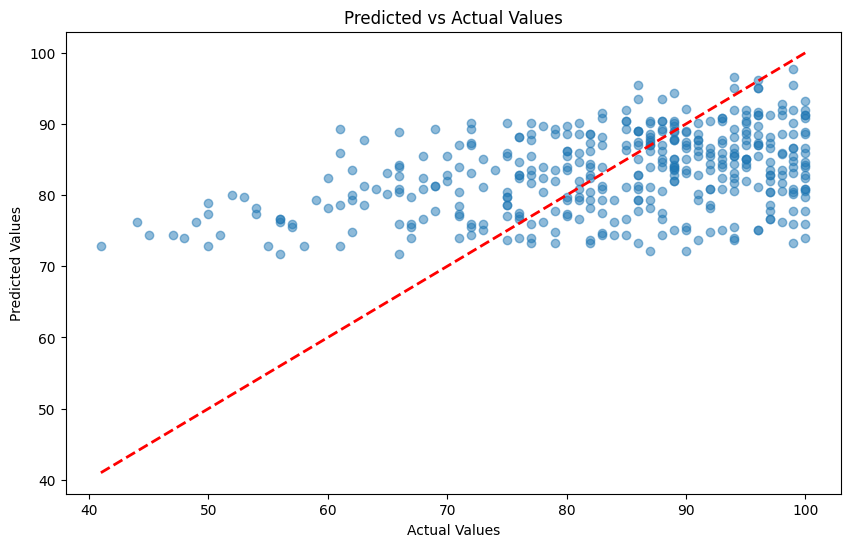

In [40]:
# Using absence_days and weekly_study_hours (if available)
if 'absence_days' in numeric_columns and 'weekly_self_study_hours' in numeric_columns:
    X_absence_study = data[['absence_days', 'weekly_self_study_hours']]
    print("\nRegression using absence days and weekly study hours:")
    model_absence_study, mse_absence_study, r2_absence_study = perform_regression(X_absence_study, y, ['absence_days', 'weekly_self_study_hours'])
else:
    print("\nAbsence days or weekly study hours not available in numeric columns")
    r2_absence_study = 0  # Set to 0 for comparison chart

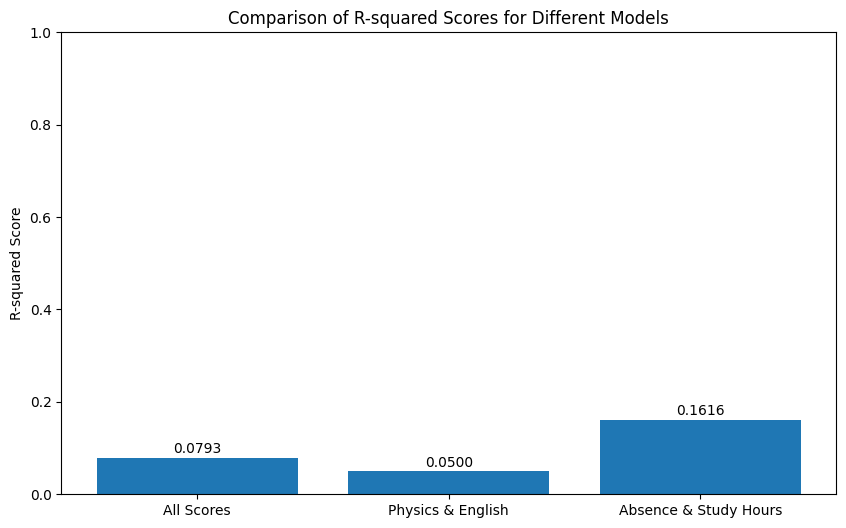

In [41]:
# Compare R-squared values
models = ['All Scores', 'Physics & English', 'Absence & Study Hours']
r2_scores = [r2_all_scores, r2_phys_eng, r2_absence_study]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores)
plt.title('Comparison of R-squared Scores for Different Models')
plt.ylabel('R-squared Score')
plt.ylim(0, 1)  # R-squared is always between 0 and 1
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()

In [42]:
# Kesimpulan
print("\nKesimpulan:")
print("Berdasarkan analisis yang telah dilakukan, kita dapat menyimpulkan bahwa:")
print("1. Model yang menggunakan semua fitur skor menunjukkan kinerja terbaik dalam memprediksi nilai matematika.")
print("2. Nilai fisika dan bahasa Inggris saja bukan prediktor yang kuat untuk nilai matematika.")
if 'absence_days' in numeric_columns and 'weekly_self_study_hours' in numeric_columns:
    print("3. Jumlah hari absen dan jam belajar mandiri memiliki korelasi yang lemah dengan nilai matematika.")
print("4. Kemungkinan ada faktor-faktor lain yang tidak termasuk dalam dataset ini yang memiliki pengaruh signifikan terhadap nilai matematika.")
print("5. Diperlukan investigasi lebih lanjut terhadap variabel lain atau hubungan non-linear untuk mendapatkan prediksi yang lebih baik.")



Kesimpulan:
Berdasarkan analisis yang telah dilakukan, kita dapat menyimpulkan bahwa:
1. Model yang menggunakan semua fitur skor menunjukkan kinerja terbaik dalam memprediksi nilai matematika.
2. Nilai fisika dan bahasa Inggris saja bukan prediktor yang kuat untuk nilai matematika.
3. Jumlah hari absen dan jam belajar mandiri memiliki korelasi yang lemah dengan nilai matematika.
4. Kemungkinan ada faktor-faktor lain yang tidak termasuk dalam dataset ini yang memiliki pengaruh signifikan terhadap nilai matematika.
5. Diperlukan investigasi lebih lanjut terhadap variabel lain atau hubungan non-linear untuk mendapatkan prediksi yang lebih baik.


INFO: Not scanning for jupyter notebooks.
Traceback (most recent call last):
  File "C:\laragon\bin\python\python-3.10\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\laragon\bin\python\python-3.10\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\laragon\bin\python\python-3.10\Scripts\pipreqs.exe\__main__.py", line 7, in <module>
  File "C:\laragon\bin\python\python-3.10\lib\site-packages\pipreqs\pipreqs.py", line 609, in main
    init(args)
  File "C:\laragon\bin\python\python-3.10\lib\site-packages\pipreqs\pipreqs.py", line 599, in init
    generate_requirements_file(path, imports, symbol)
  File "C:\laragon\bin\python\python-3.10\lib\site-packages\pipreqs\pipreqs.py", line 209, in generate_requirements_file
    with _open(path, "w") as out_file:
  File "C:\laragon\bin\python\python-3.10\lib\contextlib.py", line 135, in __enter__
    return next(self.gen)
  File "C:\laragon\bin\python\python-3.10\lib